In [1]:
!pip install yfinance
!pip install backtrader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import yfinance as yf

# Read financial data from a CSV file
data = yf.download('BRK-A')

# Calculate the moving average
data['Moving Average'] = data['Close'].rolling(window=20).mean()

# Show the result
print(data.head())


[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close  Volume  Moving Average
Date                                                                     
1980-03-17  290.0  310.0  290.0  290.0      290.0   10000             NaN
1980-03-18  290.0  290.0  290.0  290.0      290.0       0             NaN
1980-03-19  290.0  310.0  290.0  290.0      290.0   20000             NaN
1980-03-20  290.0  290.0  290.0  290.0      290.0       0             NaN
1980-03-21  290.0  290.0  290.0  290.0      290.0       0             NaN


In [3]:
import numpy as np

# Generate random stock returns
returns = np.random.normal(0.01, 0.02, 100)

# Calculate the cumulative returns
cumulative_returns = np.cumprod(1 + returns) - 1

# Print the cumulative returns
print(cumulative_returns)


[0.02069981 0.01079947 0.07887076 0.1124814  0.11919017 0.14282598
 0.14502608 0.15738779 0.16906489 0.17948862 0.2202017  0.19276908
 0.20163475 0.22406922 0.18528905 0.16095084 0.17435545 0.23331114
 0.25310556 0.23301796 0.2636003  0.32905763 0.34828297 0.3579968
 0.33983481 0.34797068 0.39394078 0.43479645 0.48728121 0.55017562
 0.56617223 0.61291088 0.60355039 0.64926706 0.66873486 0.67746194
 0.72601053 0.74584455 0.71145138 0.74391029 0.72501769 0.8011949
 0.83913904 0.83271661 0.83879588 0.84352639 0.8382458  0.91288377
 0.93888762 0.96061708 0.94080493 0.97470531 0.99316369 1.01681593
 1.08439794 1.0620253  1.04521169 1.06937328 1.07508973 1.07684864
 1.06812921 1.10741943 1.17651135 1.30780002 1.35531726 1.30498111
 1.38672942 1.4759988  1.45798093 1.50923465 1.48739279 1.53014628
 1.60976183 1.71452176 1.70841369 1.70946395 1.7989085  1.82147661
 1.90111266 1.99482372 2.05105967 2.06017746 1.99825143 2.11032431
 2.16329834 2.17109193 2.22280694 2.23192222 2.34312004 2.451196

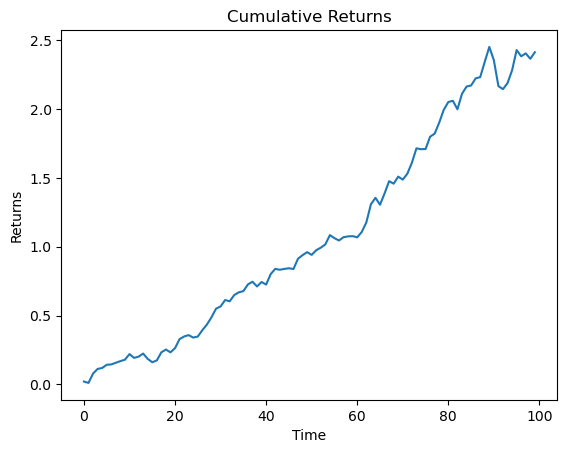

In [4]:
import matplotlib.pyplot as plt

# Plot the cumulative returns
plt.plot(cumulative_returns)

# Add title and labels
plt.title('Cumulative Returns')
plt.xlabel('Time')
plt.ylabel('Returns')

# Show the plot
plt.show()


In [6]:
import statsmodels.api as sm

# Calculate daily returns
data['Market Return'] = data['Adj Close'].pct_change()
data['Stock Return'] = data['Adj Close'].pct_change()

# Drop missing values
data = data.dropna()

# Define the independent and dependent variables
X = data['Market Return']
Y = data['Stock Return']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stock Return   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.280e+35
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:18:49   Log-Likelihood:             4.2163e+05
No. Observations:               10843   AIC:                        -8.433e+05
Df Residuals:                   10841   BIC:                        -8.432e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.571e-19   3.01e-20      5.213

In [7]:
import backtrader as bt

class MovingAverageStrategy(bt.Strategy):

    def __init__(self):
        self.ma = bt.indicators.SimpleMovingAverage(self.data.close, period=20)

    def next(self):
        if self.data.close[0] > self.ma[0]:
            self.buy()
        elif self.data.close[0] < self.ma[0]:
            self.sell()

# Convert the data to a backtrader format
data = bt.feeds.PandasData(dataname=data)

# Create a Cerebro instance
cerebro = bt.Cerebro()

# Set the initial cash balance
cerebro.broker.setcash(100000.0)

# Add the data feed
cerebro.adddata(data)

# Add the strategy
cerebro.addstrategy(MovingAverageStrategy)

# Add analyzers
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio')

# Run the backtest
results = cerebro.run()

# Print the stats
sharpe_ratio = results[0].analyzers.sharpe_ratio.get_analysis()
final_value = cerebro.broker.getvalue()
print('Sharpe Ratio:', sharpe_ratio)
print('Final Value:', final_value)

Sharpe Ratio: OrderedDict([('sharperatio', 0.37518038014928456)])
Final Value: 3068194.0
